In [65]:
import json
import nltk
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
%matplotlib inline

In [74]:
# require for the first time running nltk to download the corpora and tokenizers
# nltk.download("stopwords")
# nltk.download('punkt')

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 0)

In [4]:
df_amzn = pd.read_csv("../data/amazon-2023-05-21.csv")
with open("../data/amazon-filter-2023-05-21.json") as f:
    filter_amzn = json.load(f)

## What to analyse
1. Basic eda (count the frequency of important columns)
2. Basic text manipulation (e.g. get the frequency of long text column)
3. NLP for job description and job title
4. Graph analysis (showing how well a resume is connected to a bunch of resume, and return the one with the best match)

In [17]:
count_columns = ["business_category", "city", "company_name", "country_code", "job_category", "job_family", "job_schedule_type", "normalized_location", "primary_search_label", "source_system"]
nlp_columns = ["basic_qualifications", "description", "preferred_qualifications", "title"]

## Plotting

In [50]:
def plot_habr(df, col: str):
    series = df[col].value_counts()[:20]
    sns.set(rc={"figure.figsize":(8, 8)})
    sns.set_theme(style="whitegrid")
    sns.barplot(x=series.values, y=series.index,
                label="Total", color="b", orient="h").set(title=col.replace("_", " "))
    sns.despine(left=True, bottom=True)

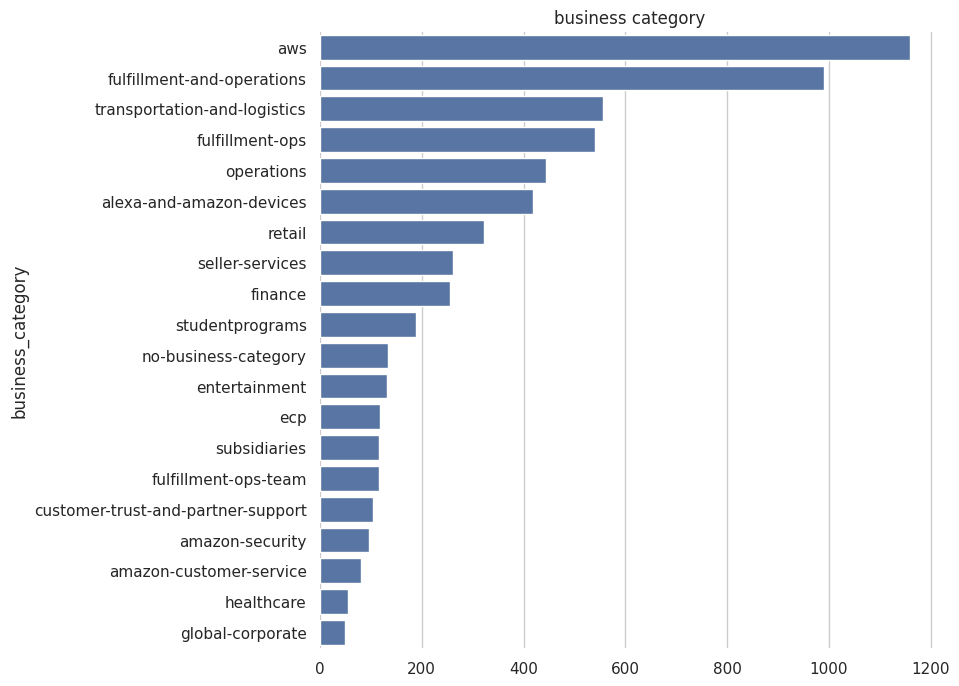

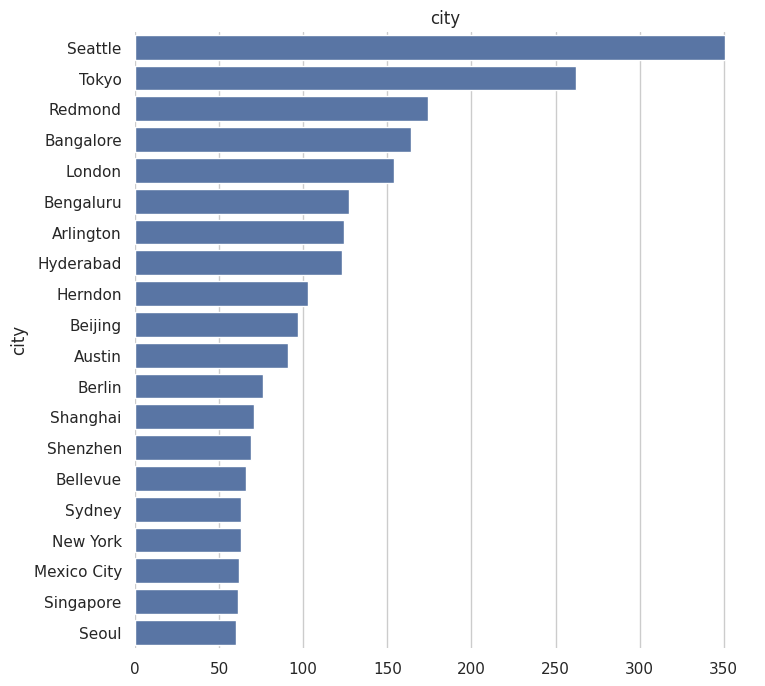

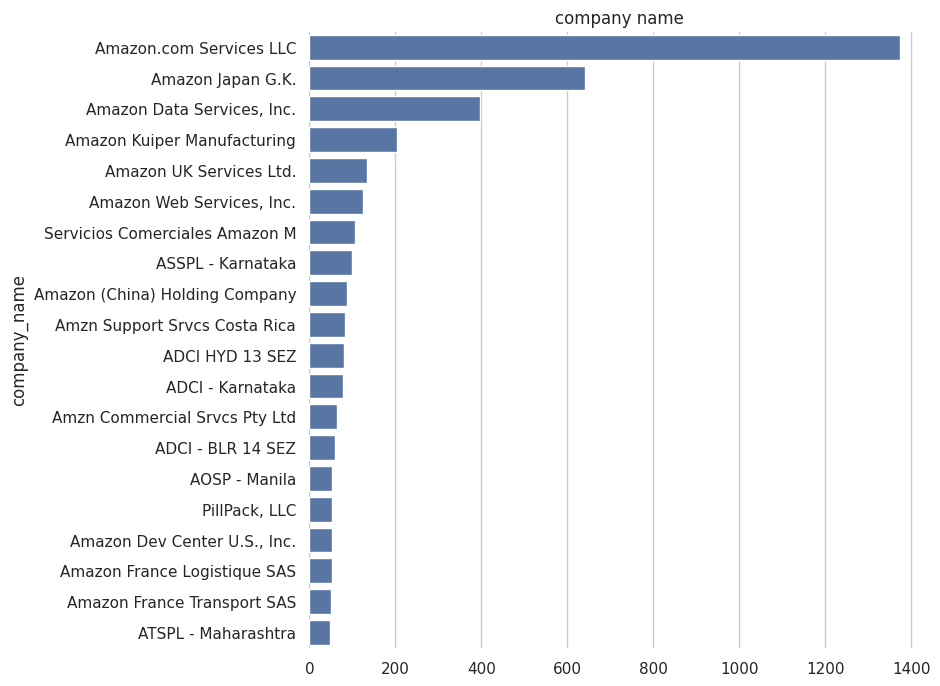

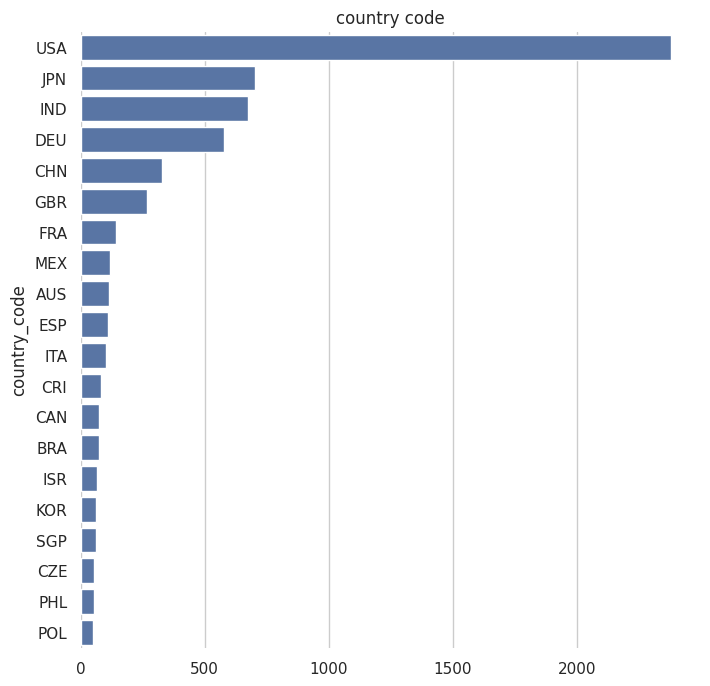

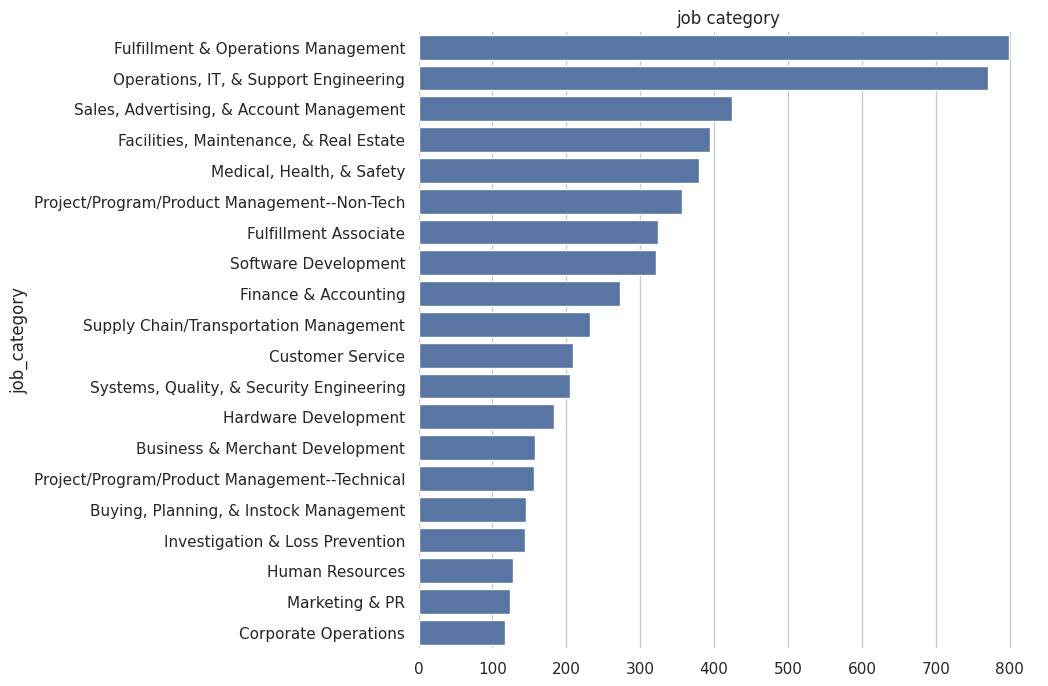

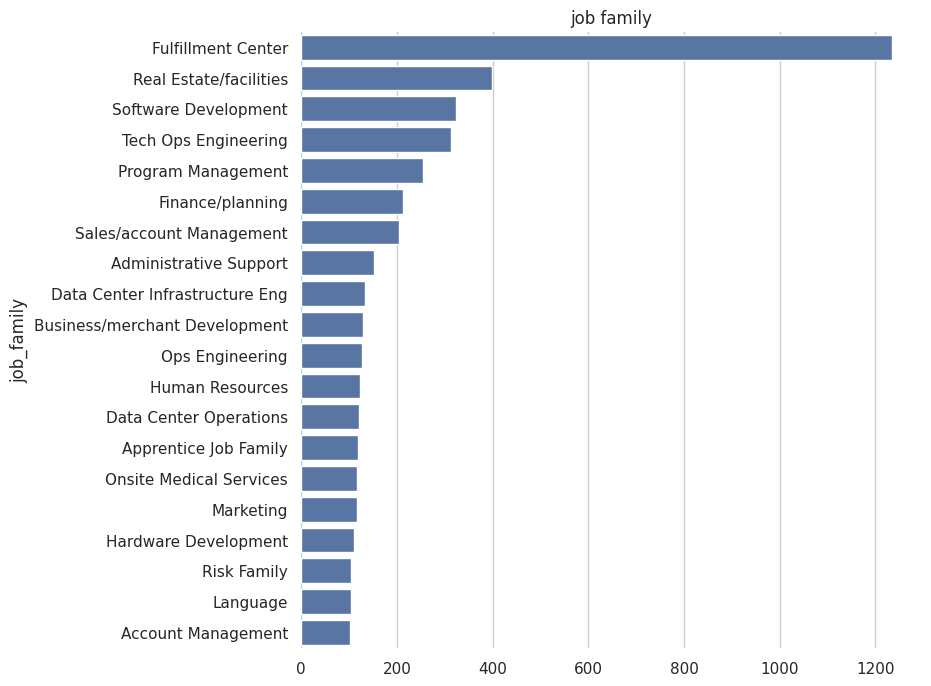

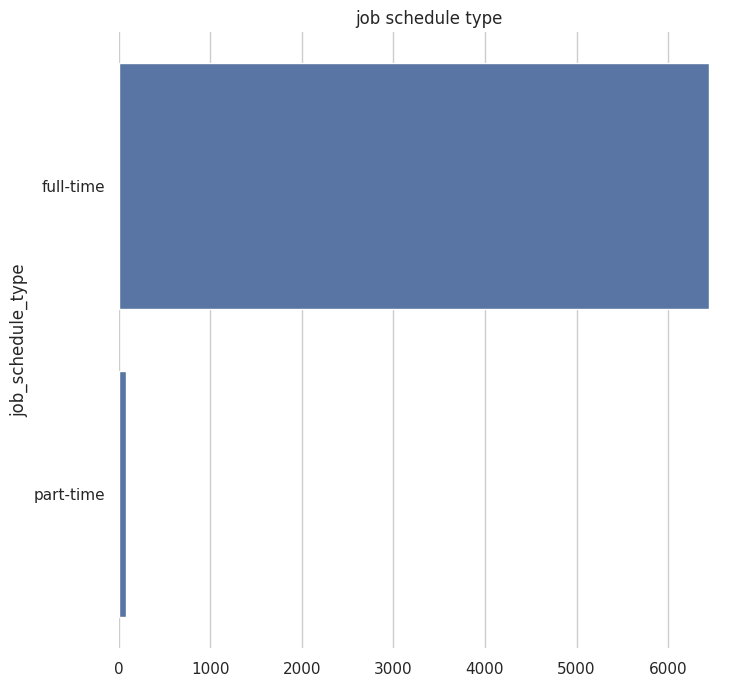

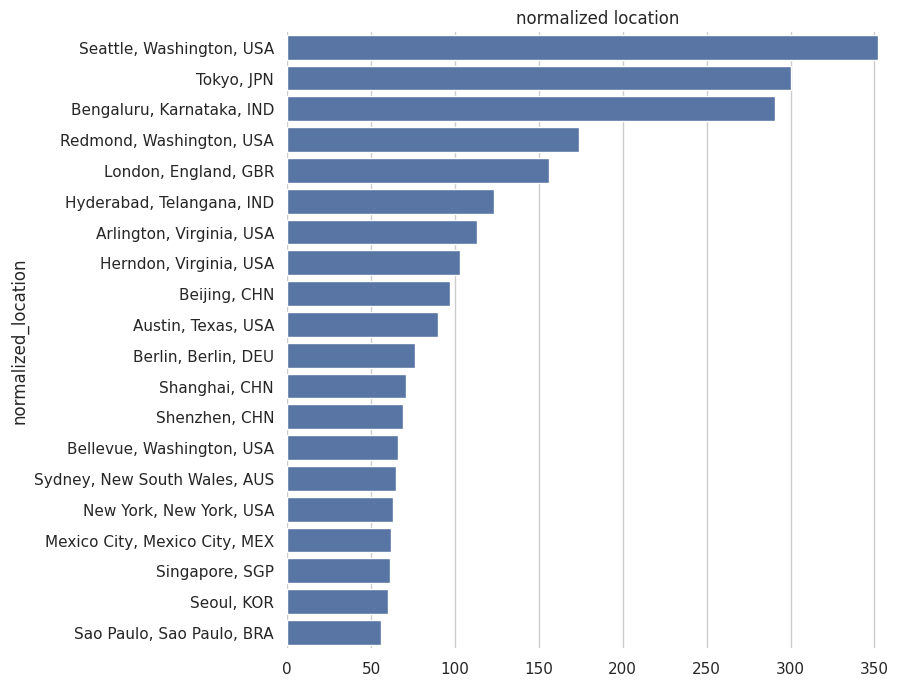

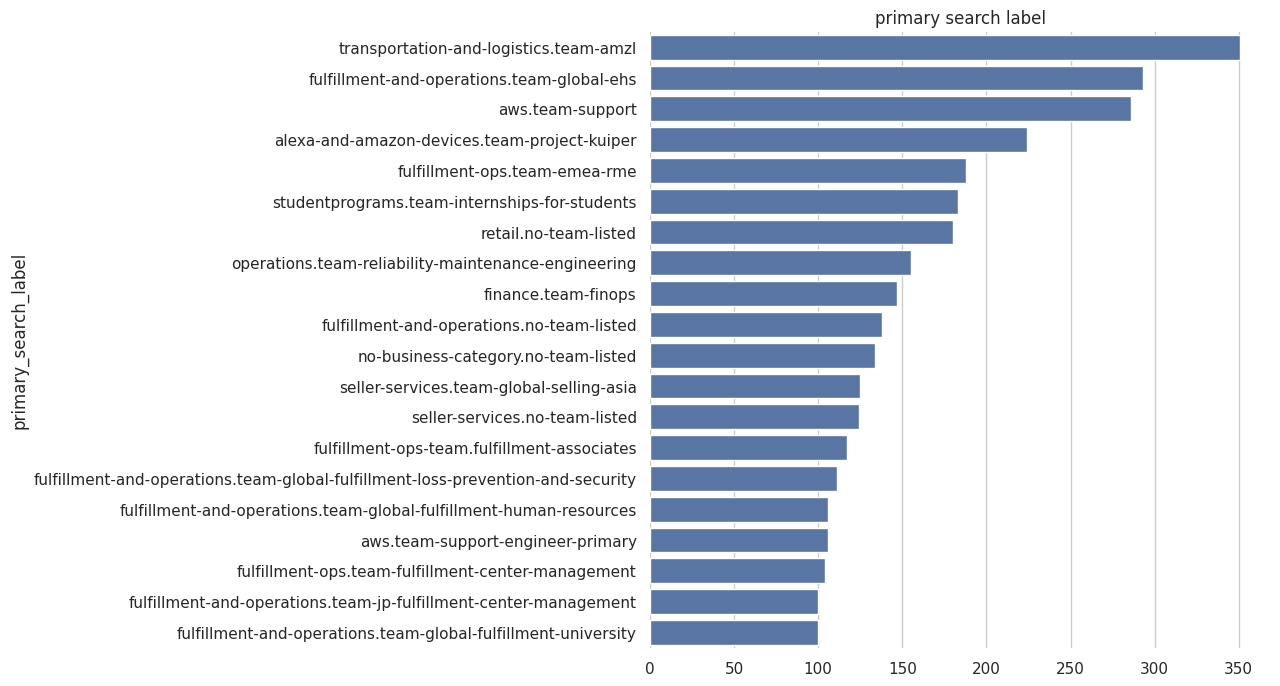

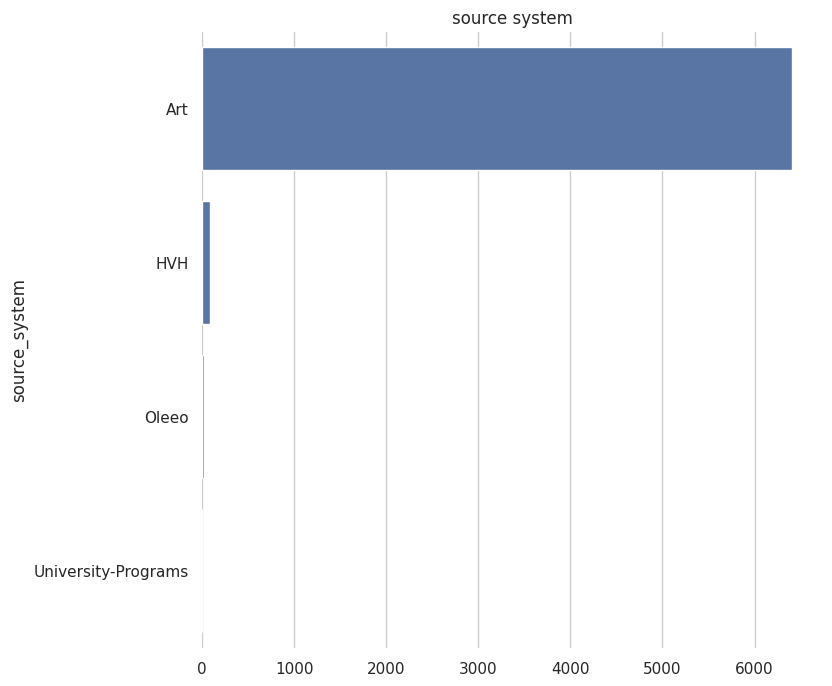

In [51]:
for i, col in enumerate(count_columns):
    plt.figure(i)
    plot_habr(df_amzn, col)

In [106]:
# print the aws job location
df_amzn[df_amzn["business_category"] == "aws"]["city"].value_counts()[:50]

city
Herndon          95
Seattle          89
Tokyo            51
London           46
Seoul            41
Dublin           39
Austin           39
Singapore        36
Haifa            31
Boardman         31
Frankfurt        31
Umatilla         29
Tel Aviv         27
Sydney           26
Cupertino        25
Arlington        23
Chantilly        19
Hilliard         19
Sterling         16
Reading          15
San Francisco    15
New York         14
New Albany       14
Bangkok          13
Sao Paulo        12
Santa Clara      12
Taipei           11
Zagreb           10
Berlin           10
San Antonio      9 
Shanghai         9 
Chicago          8 
Manassas         8 
Paris            8 
Beijing          8 
Mumbai           8 
Ashburn          7 
Causeway Bay     7 
Atlanta          7 
Hyderabad        7 
Melbourne        7 
Jakarta          6 
Queretaro        6 
Milan            6 
Toronto          6 
Pointe-Claire    5 
Si Racha         5 
Kuala Lumpur     5 
Munich           5 
Hermiston      

In [100]:
# print the job title in Singapore
sorted(df_amzn[df_amzn["city"] == "Singapore"]["title"].unique())

[' Data Center Security Specialist Intern',
 ' Public Sector Account Manager, WWPS Singapore',
 'APJ Solutions Architecture Manager, NoSQL Databases',
 'APJ Storage Leader',
 'ASEAN Business Strategy Lead, Global Development, Project Kuiper ',
 'ASEAN Head of Solutions Architecture, Data and Analytics',
 'AWS SOC Security Analyst II, AWS PhsyOps',
 'AWS SOC Security Analyst II, AWS SOC PhsyOps',
 'Account Manager Intern, Amazon Global Selling',
 'Account Rep Intern, Amazon Global Selling',
 'BIM Client Information Manager ',
 'Backbone Network Developer, APAC, Global Connectivity Infrastructure Development',
 'Business Developer Intern, Amazon Global Selling',
 'Colo. Build Program Manager, APJC',
 'Commissioning Program Manager, Data Center Capacity Delivery',
 'Confidential HR Leadership',
 'Content Policy Manager, Prime Video Trust & Safety',
 'Controls Design Engineer',
 'DC Engineering Ops Engineer, Data Center Engineering Operations',
 'Data Center Design Manager, Data Center Eng

In [108]:
# print the job title in Singapore
sorted(df_amzn[(df_amzn["city"] == "Singapore") & (df_amzn["business_category"] == "aws")]["title"].unique())

[' Data Center Security Specialist Intern',
 ' Public Sector Account Manager, WWPS Singapore',
 'APJ Solutions Architecture Manager, NoSQL Databases',
 'APJ Storage Leader',
 'ASEAN Head of Solutions Architecture, Data and Analytics',
 'BIM Client Information Manager ',
 'Backbone Network Developer, APAC, Global Connectivity Infrastructure Development',
 'Colo. Build Program Manager, APJC',
 'Commissioning Program Manager, Data Center Capacity Delivery',
 'Controls Design Engineer',
 'DC Engineering Ops Engineer, Data Center Engineering Operations',
 'Data Center Design Manager, Data Center Engineering',
 'Data Center Engineering Operation Engineer ',
 'Data Center Engineering Operation Engineer , Data Center Engineering Operations',
 'Data Center Operations Manager',
 'Data Center Operations Technician, Data Center Operations ',
 'Data Center Operations Trainee',
 'Data Center Systems Engineer ',
 'Datacenter Security Specialist',
 'EDGE Project lead, Infrastructure Delivery Edge',
 '

## nltk

In [61]:
df_amzn["basic_qualifications"][0]

'<ul><li>6+ years of sales experience</li><li>8+ years of digital sales, account management, business development, or partner management experience</li><li>Experience analyzing data and best practices to assess performance drivers</li><li>Experience and understanding of the retail and wholesale landscape in India and exposure to prior interactions with sellers and distributors</li><li>Experience managing and growing complex business relationship at scale</li></ul>'

In [91]:
# "basic_qualifications", "description", "preferred_qualifications", "title"

def text_preprocess(text):
    regex = re.compile('<.*?>')
    text = re.sub(regex, ' ', text)
    text = re.sub('\s+',' ',text)
    text = re.sub(r'[^a-zA-Z0-9\s+]', '', text)
    return text

def nltk_preprocess(text, bigram=True):
    stop_words = set(stopwords.words('english'))
    ls_text = nltk.word_tokenize(text)
    ls_text = [w.lower() for w in ls_text if not w.lower() in stop_words]
    if bigram is True:
        ls_text = list(nltk.bigrams(ls_text))
    return ls_text

def preprocess(text, bigram=True):
    return nltk_preprocess(text_preprocess(text), bigram=bigram)

# preprocess(df_amzn["basic_qualifications"][0], bigram=False)

In [88]:
words = []
for text in df_amzn["basic_qualifications"]:
    words.extend(preprocess(text, bigram=False))
fdist = nltk.FreqDist(words)
fdist.most_common(100)

[('experience', 13025),
 ('years', 6772),
 ('degree', 3347),
 ('skills', 3019),
 ('ability', 2797),
 ('management', 2793),
 ('work', 2263),
 ('bachelors', 2226),
 ('de', 2020),
 ('business', 1900),
 ('data', 1854),
 ('engineering', 1769),
 ('equivalent', 1764),
 ('related', 1569),
 ('und', 1539),
 ('systems', 1507),
 ('strong', 1495),
 ('excel', 1461),
 ('communication', 1417),
 ('written', 1367),
 ('5+', 1336),
 ('including', 1290),
 ('english', 1280),
 ('working', 1274),
 ('knowledge', 1244),
 ('environment', 1205),
 ('field', 1202),
 ('design', 1157),
 ('high', 1150),
 ('security', 1119),
 ('2+', 1111),
 ('technical', 1089),
 ('3+', 1037),
 ('andor', 1033),
 ('computer', 984),
 ('development', 976),
 ('office', 973),
 ('microsoft', 941),
 ('verbal', 936),
 ('excellent', 931),
 ('professional', 895),
 ('must', 891),
 ('using', 887),
 ('electrical', 883),
 ('software', 879),
 ('customer', 858),
 ('1+', 837),
 ('teams', 820),
 ('du', 808),
 ('team', 786),
 ('school', 786),
 ('et', 783)

In [90]:
words = []
for text in df_amzn["basic_qualifications"]:
    words.extend(preprocess(text, bigram=True))
fdist = nltk.FreqDist(words)
fdist.most_common(100)

[(('years', 'experience'), 2223),
 (('bachelors', 'degree'), 1988),
 (('5+', 'years'), 1302),
 (('2+', 'years'), 1078),
 (('3+', 'years'), 1014),
 (('communication', 'skills'), 870),
 (('management', 'experience'), 756),
 (('1+', 'years'), 737),
 (('related', 'field'), 651),
 (('experience', 'experience'), 626),
 (('high', 'school'), 624),
 (('computer', 'science'), 615),
 (('experience', 'working'), 562),
 (('microsoft', 'office'), 541),
 (('ability', 'work'), 532),
 (('equivalent', 'diploma'), 475),
 (('school', 'equivalent'), 470),
 (('project', 'management'), 453),
 (('written', 'verbal'), 450),
 (('experience', 'using'), 443),
 (('systems', 'experience'), 394),
 (('skills', 'ability'), 386),
 (('7+', 'years'), 386),
 (('experience', '5+'), 377),
 (('work', 'experience'), 373),
 (('verbal', 'written'), 352),
 (('experience', 'managing'), 344),
 (('equivalent', 'experience'), 344),
 (('ms', 'office'), 343),
 (('software', 'development'), 341),
 (('4+', 'years'), 319),
 (('masters', 

In [92]:
def get_freq(series):
    words = []
    for text in series:
        words.extend(preprocess(text, bigram=True))
    fdist = nltk.FreqDist(words)
    return fdist.most_common(100)

In [96]:
series = df_amzn[df_amzn["city"] == 'Singapore']["basic_qualifications"]
get_freq(series)

[(('bachelors', 'degree'), 25),
 (('5+', 'years'), 19),
 (('years', 'experience'), 18),
 (('communication', 'skills'), 16),
 (('2+', 'years'), 16),
 (('mission', 'critical'), 12),
 (('work', 'experience'), 11),
 (('3+', 'years'), 10),
 (('verbal', 'written'), 9),
 (('support', 'experience'), 8),
 (('verbal', 'communication'), 8),
 (('attention', 'detail'), 8),
 (('fastpaced', 'environment'), 8),
 (('7+', 'years'), 7),
 (('data', 'center'), 7),
 (('years', 'relevant'), 7),
 (('organizational', 'skills'), 7),
 (('years', 'technical'), 6),
 (('good', 'knowledge'), 6),
 (('written', 'communication'), 6),
 (('written', 'verbal'), 6),
 (('project', 'management'), 6),
 (('management', 'experience'), 6),
 (('team', 'player'), 6),
 (('computer', 'science'), 5),
 (('good', 'communication'), 5),
 (('business', 'development'), 5),
 (('experience', 'working'), 5),
 (('basic', 'qualifications'), 5),
 (('critical', 'environment'), 5),
 (('strong', 'attention'), 5),
 (('prioritize', 'complex'), 5),
 (